In [198]:
import numpy as np
import random
import time
from scipy.fftpack import fft, ifft
from scipy import linalg
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
#import pylab
import matplotlib.patches
import matplotlib.lines
import matplotlib.path
from sympy import diff, symbols, cos, sin

a=1
#du_dt1 = -a*sin(a*t - 2*pi*x)
#u_dx1 = 2*pi*sin(a*t - 2*pi*x)
#du_dxLdu_dx1 = -4*pi**2*(-x + 1.01)*cos(a*t - 2*pi*x) - 2*pi*sin(a*t - 2*pi*x)
#ff1 = du_dt1 - du_dxLdu_dx1
l = 1
T=1

tau = 0.0025
h=1/10
sigma = 1
w,q = int(l/h), int(T/tau);

Matrix = [[0 for x in range(q+1)] for y in range(w+1)] 

for i in range(w):
    Matrix[i][0] = math.sin(i*h)
for j in range(q+1):
    #Matrix[0][j] =0
    Matrix[w][j] = math.sin((j*tau+1))

#print(Matrix)
#lam = 1

In [199]:
a=1
def Lamb(x):
    return 1;
def ff(x, t):
    return math.pow(2,1/2)*math.sin(math.pi/4+x+t)
def TrehDiag(a,b,c,f):
    alpha = [0]
    beta = [0]
    n = len(f)
    x = [0]*n
    for i in range(n-1):
        alpha.append(-b[i]/(a[i-1]*alpha[i] + c[i]))
        beta.append((f[i] - a[i-1]*beta[i])/(a[i-1]*alpha[i] + c[i]))
    x[n-1] = (f[n-1] - a[n-2]*beta[n-1])/(c[n-1] + a[n-2]*alpha[n-1])
    for i in reversed(range(n-1)):
        x[i] = alpha[i+1]*x[i+1] + beta[i+1]
    return x

In [200]:
a=1
for j in range (q):
    aa=[]
    b=[]
    b.append(sigma/h)
    c=[]
    c.append(-sigma/h-2*sigma-h/(2*tau))
    f=[]
    f.append(-(math.cos(tau*j)-2*math.sin(tau*j)+h/2*pow(2,1/2)*math.sin(math.pi/4+tau*j))-Matrix[1][j]*((1-sigma)/h)-Matrix[0][j]*(-(1-sigma)/h-2*(1-sigma)+h/(2*tau)))
    #print(j,"j")
    for i in range (1,w):
        #print(ff(i*h,j*h))
        #print(i,"i")
        #f.append(-(1/tau*Matrix[i][j]+(((1-sigma)/h**2)*(lamb(i*h) - lamb((i+1)*h))*((Matrix[i][j])-(Matrix[i-1][j])) + lamb((i+1)*h)*((Matrix[i+1][j])-2*Matrix[i][j]+Matrix[i-1][j]))+sigma*ff(i*h,(j+1)*h)+(1-sigma)*ff(i*h,j*h)))
        #b.append(-sigma*(lamb((i+1)*h))/h**2)
        #c.append((1/tau-(sigma/h**2)*(lamb((i+1)*h)-lamb(i*h))-2*sigma*lamb((i+1)*h)/h**2))
        #aa.append(-(sigma/h**2)*(lamb((i+1)*h)-lamb(i*h)) - (sigma/h**2)*(lamb((i+1)*h)))  
        f.append(-((1-sigma)*Lamb((i-1/2)*h)/h**2*Matrix[i-1][j]+((1-sigma)*(Lamb((i+1/2)*h)+Lamb((i-1/2)*h))/(-h**2)+1/tau)*Matrix[i][j]+(1-sigma)*Lamb((i+1/2)*h)/h**2*Matrix[i+1][j]+sigma*ff(i*h,(j+1)*tau)+(1-sigma)*ff(i*h,j*tau)))
        aa.append(sigma*Lamb((i-1/2)*h)/h**2)
        c.append(-(sigma*(Lamb((i+1/2)*h)+Lamb((i-1/2)*h))/h**2+1/tau))
        b.append(sigma*Lamb((i+1/2)*h)/h**2)
    aa.append(0)
    c.append(1)
    f.append(Matrix[-1][j+1])
    #print(f)
    #aa = np.array(aa)
    #mat = np.diag(aa, -1) + np.diag(c, 0) + np.diag(b, 1)
    #print(mat,f)
    ga = TrehDiag(aa,b,c,f)#np.linalg.solve(mat, f)
    #print(mat,f)
    for i in range (w+1):
        Matrix[i][j+1] = ga[i]
    #print(ga)
        

In [201]:
dfd = np.array(Matrix)
k=40
for i in range(11):
    print("time",0.1*i)
    print("res",dfd[:,i*k])

time 0.0
res [0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691 0.84147098]
time 0.1
res [0.47776375 0.49514042 0.51955862 0.5525037  0.59376921 0.64181171
 0.69421758 0.74815987 0.80075442 0.84927185 0.89120736]
time 0.2
res [0.56766905 0.61907723 0.66596537 0.70982969 0.75151006 0.79120916
 0.82855137 0.86267158 0.89232342 0.91599697 0.93203909]
time 0.30000000000000004
res [0.59402038 0.66991786 0.73547739 0.79190139 0.84004579 0.88042099
 0.91321274 0.93832189 0.95542048 0.96402139 0.96355819]
time 0.4
res [0.58507263 0.67967981 0.76021221 0.82769218 0.88296188 0.92668511
 0.95936076 0.98134759 0.99289898 0.99420648 0.98544973]
time 0.5
res [0.55323855 0.66265492 0.75546172 0.83258727 0.89488412 0.94313152
 0.97804489 1.00029191 1.01051472 1.00935702 0.99749499]
time 0.6000000000000001
res [0.50577993 0.62715764 0.73017837 0.81572617 0.88467867 0.93790901
 0.9762921  1.0007148  1.01208952 1.01137077 0.9995736 ]
time 0.700

In [142]:
dfd = np.array(Matrix)
print(dfd[:,1])

[0.06831651 0.11361284 0.20305612 0.29823973 0.3917764  0.48162728
 0.56670514 0.6461274  0.71909494 0.78487783 0.84281911]


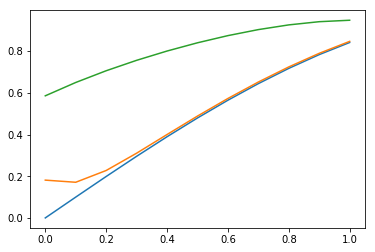

In [143]:
dfd = np.array(Matrix)
xxx = [i*h for i in range(w+1)]
y1 = (dfd[:,0])
y2 = (dfd[:,4])
y3 = (dfd[:,99])
#print(y1,y2,y3)
plt.plot(xxx, y1)
plt.plot(xxx, y2)
plt.plot(xxx, y3)
plt.show()